In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pp
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.grid'] = True

import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)
import scipy.stats as stats

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

from datetime import datetime

In [2]:
d1=pd.read_csv('C:\\Users\\Yash\\Desktop\\STATS\\CASE STUDY FOR PANDAS\\3. Pandas Case Study 1 - Retail Case Study\\Customer.csv')
d2=pd.read_csv('C:\\Users\\Yash\\Desktop\\STATS\\CASE STUDY FOR PANDAS\\3. Pandas Case Study 1 - Retail Case Study\\Transactions.csv')
d3=pd.read_csv('C:\\Users\\Yash\\Desktop\\STATS\\CASE STUDY FOR PANDAS\\3. Pandas Case Study 1 - Retail Case Study\\prod_cat_info.csv')



In [3]:
d4 = pd.merge(left = d1,right = d2,left_on = 'customer_Id',right_on = 'cust_id',how = 'inner',indicator = True)

In [4]:
d5 = pd.merge(left = d4,right = d3,left_on = 'prod_cat_code',right_on = 'prod_cat_code',how = 'inner')

In [5]:
d5.head()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics


In [6]:
d5.shape

(99293, 18)

In [7]:
d5.select_dtypes(include=['int64','float64']).columns

Index(['customer_Id', 'city_code', 'transaction_id', 'cust_id',
       'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt',
       'prod_sub_cat_code'],
      dtype='object')

In [8]:
d5.select_dtypes(include=['object']).columns

Index(['DOB', 'Gender', 'tran_date', 'Store_type', 'prod_cat', 'prod_subcat'], dtype='object')

In [9]:
#Top/Bottom 10 observations

In [10]:
d5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99293 entries, 0 to 99292
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   customer_Id        99293 non-null  int64   
 1   DOB                99293 non-null  object  
 2   Gender             99253 non-null  object  
 3   city_code          99257 non-null  float64 
 4   transaction_id     99293 non-null  int64   
 5   cust_id            99293 non-null  int64   
 6   tran_date          99293 non-null  object  
 7   prod_subcat_code   99293 non-null  int64   
 8   prod_cat_code      99293 non-null  int64   
 9   Qty                99293 non-null  int64   
 10  Rate               99293 non-null  int64   
 11  Tax                99293 non-null  float64 
 12  total_amt          99293 non-null  float64 
 13  Store_type         99293 non-null  object  
 14  _merge             99293 non-null  category
 15  prod_cat           99293 non-null  object  
 16  prod

In [11]:
d5.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,7,Fiction
1,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,12,Academic
2,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,10,Non-Fiction
3,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,11,Children
4,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,3,Comics
5,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,both,Books,6,DIY
6,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,7,Fiction
7,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,12,Academic
8,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,10,Non-Fiction
9,268159,08-01-1970,F,8.0,65867401816,268159,31-03-2013,11,5,5,214,112.350,1182.350,MBR,both,Books,11,Children


In [12]:
d5.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,_merge,prod_cat,prod_sub_cat_code,prod_subcat
99283,274618,09-12-1992,F,7.0,98631113719,274618,19-04-2013,3,1,2,721,151.41,1593.41,e-Shop,both,Clothing,3,Kids
99284,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,4,Mens
99285,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,1,Women
99286,268097,15-12-1992,F,7.0,71286190189,268097,5/9/2011,4,1,5,818,429.45,4519.45,e-Shop,both,Clothing,3,Kids
99287,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,4,Mens
99288,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,1,Women
99289,271772,17-12-1992,M,2.0,10440850091,271772,26-04-2013,4,1,4,819,343.98,3619.98,Flagship store,both,Clothing,3,Kids
99290,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,4,Mens
99291,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,1,Women
99292,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.57,3573.57,MBR,both,Clothing,3,Kids


In [13]:
#“Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [14]:
d5.describe()

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
count,99293.000000,99257.000000,9.929300e+04,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000,99293.000000
mean,271030.010635,5.467221,5.007320e+10,271030.010635,6.796894,4.003243,2.438017,637.919884,248.873736,2114.616420,6.806985
std,2429.333624,2.859343,2.899361e+10,2429.333624,3.609439,1.563991,2.260726,621.576326,187.014422,2502.306768,3.615952
min,266783.000000,1.000000,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000
25%,268956.000000,3.000000,2.492150e+10,268956.000000,4.000000,3.000000,1.000000,313.000000,98.280000,762.450000,4.000000
50%,270982.000000,5.000000,5.011083e+10,270982.000000,7.000000,5.000000,3.000000,713.000000,199.920000,1761.370000,7.000000
75%,273120.000000,8.000000,7.528121e+10,273120.000000,10.000000,5.000000,4.000000,1109.000000,366.975000,3585.725000,10.000000
max,275265.000000,10.000000,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000


In [15]:
minimum = d5['total_amt'].min()
maximum = d5['total_amt'].max()
Q1  = np.percentile(d5.total_amt,25)
median  = np.percentile(d5.total_amt,50)
Q3  = np.percentile(d5.total_amt,75)
print('Min = ',minimum)
print('Max = ',maximum)
print('Median = ',median)
print('Q1 = ',Q1)
print('Q3 = ',Q3)

Min =  -8270.925
Max =  8287.5
Median =  1761.37
Q1 =  762.45
Q3 =  3585.725


In [16]:
d5.isnull().sum()

customer_Id           0
DOB                   0
Gender               40
city_code            36
transaction_id        0
cust_id               0
tran_date             0
prod_subcat_code      0
prod_cat_code         0
Qty                   0
Rate                  0
Tax                   0
total_amt             0
Store_type            0
_merge                0
prod_cat              0
prod_sub_cat_code     0
prod_subcat           0
dtype: int64

In [17]:
#Frequency Tables for all the categorical variables
d5.select_dtypes(include=['object']).columns

Index(['DOB', 'Gender', 'tran_date', 'Store_type', 'prod_cat', 'prod_subcat'], dtype='object')

In [18]:
#Store_type
Frequency_Tables = pd.crosstab(index = d5['Gender'],columns = d5['Store_type'])
Frequency_Tables.columns = ['TeleShop','MBR','e-shop','Flagshipstore']
Frequency_Tables.index = ['Male','Female']
Frequency_Tables

,TeleShop,MBR,e-shop,Flagshipstore
Male,9767,9687,9159,19589
Female,10047,10278,10142,20584


In [19]:
#prod_subcat
Frequency_Tables = pd.crosstab(index = d5['Gender'],columns = d5['prod_subcat'])
Frequency_Tables.columns = ['Men','Women','Kid','Mobile','Computer','Personal Appliances','Cameras','Audio and video',
                      'Fiction','Academic','Non-fiction','Children','Comics','DIY','Furnishing','Kitchen',
                      'Bath','Tools']
Frequency_Tables.index = ['Male','Female']
Frequency_Tables

,Men,Women,Kid,Mobile,Computer,Personal Appliances,Cameras,Audio and video,Fiction,Academic,Non-fiction,Children,Comics,DIY,Furnishing,Kitchen,Bath,Tools
Male,2949,2328,1994,2328,2949,2949,2328,2949,2949,1994,2968,1994,3962,2328,2949,2328,1994,3962
Female,3116,2570,2134,2570,3116,3116,2570,3116,3116,2134,2987,2134,3991,2570,3116,2570,2134,3991


In [20]:
#prod_cat
Frequency_Tables = pd.crosstab(index = d5['Gender'],
                         columns = d5['prod_cat'])
Frequency_Tables.columns = ['Books','Bags','Clothing','Footwear','Electronics','Home and kitchen']
Frequency_Tables.index = ['Male','Female']
Frequency_Tables

,Books,Bags,Clothing,Footwear,Electronics,Home and kitchen
Male,1988,17694,4317,11640,4587,7976
Female,2008,18696,4554,12850,4407,8536


In [21]:
#3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [22]:
#. Generate histograms for all continuous variables
def fn_hist(x):
    plt.figure(figsize=(3, 2))
    x.hist()
    plt.grid(True)
    plt.title('This is a hist for ' + x.name)
    plt.show()

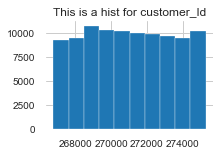

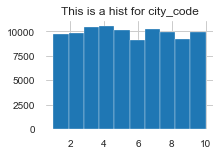

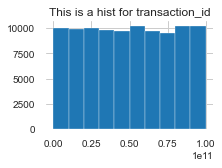

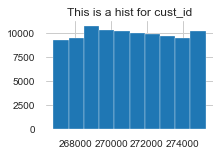

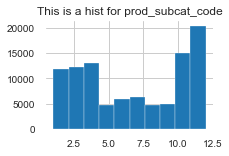

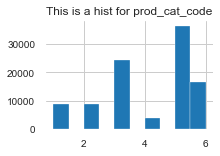

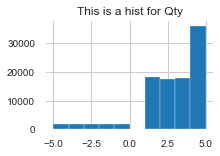

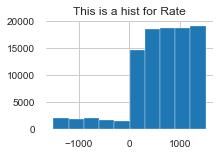

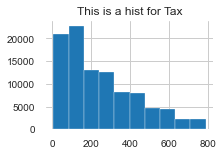

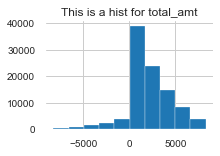

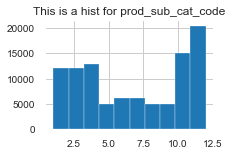

customer_Id          None
city_code            None
transaction_id       None
cust_id              None
prod_subcat_code     None
prod_cat_code        None
Qty                  None
Rate                 None
Tax                  None
total_amt            None
prod_sub_cat_code    None
dtype: object

In [23]:
d5.select_dtypes(['float64', 'int64', 'float32', 'int32']).apply(fn_hist)

In [24]:
d5.select_dtypes(include=['object']).columns

Index(['DOB', 'Gender', 'tran_date', 'Store_type', 'prod_cat', 'prod_subcat'], dtype='object')

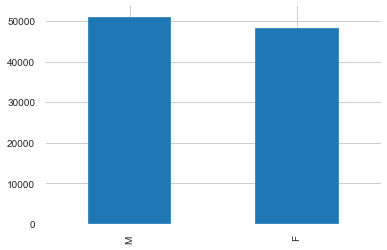

In [25]:
# frequency bars for categorical variables.
d5['Gender'].value_counts().plot(kind='bar')


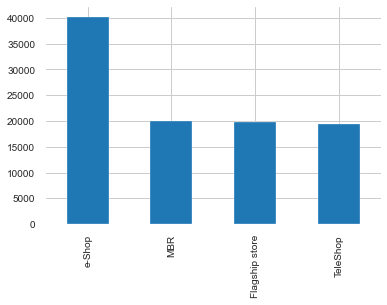

In [26]:
d5['Store_type'].value_counts().plot(kind='bar')

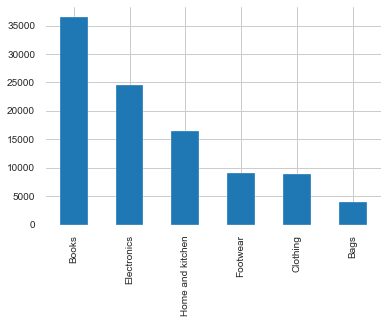

In [27]:
d5['prod_cat'].value_counts().plot(kind='bar')


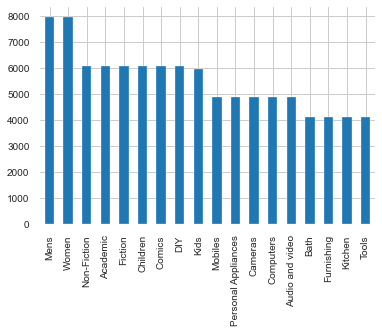

In [28]:
d5['prod_subcat'].value_counts().plot(kind='bar')

In [33]:
#a. Time period of the available transaction data
Max_Available_Date=d5.tran_date.max()
Max_Available_Date
#d5 = d5.groupby(d5.tran_date.date).last().reset_index(drop=True)
#print (d5)

'9/9/2013'

In [34]:
#b. Count of transactions where the total amount of transaction was negative
d5.loc[(d5.Qty<0)].count()

customer_Id          9294
DOB                  9294
Gender               9291
city_code            9294
transaction_id       9294
cust_id              9294
tran_date            9294
prod_subcat_code     9294
prod_cat_code        9294
Qty                  9294
Rate                 9294
Tax                  9294
total_amt            9294
Store_type           9294
_merge               9294
prod_cat             9294
prod_sub_cat_code    9294
prod_subcat          9294
dtype: int64

In [35]:
#Q5. Analyze which product categories are more popular among females vs male customers

In [36]:

Male = d5.loc[d5['Gender']=='M']
group_1 = Male.groupby(['prod_cat'])['total_amt'].sum()
product_categories_M = group_1.nlargest(1)#decimals
print(' Male customers is---',product_categories_M)
print('\n')
Female = d5.loc[d5['Gender']=='F']
group_2 =Female.groupby(['prod_cat'])['total_amt'].sum()
product_categories_F = group_2.nlargest(1)#decimals
print('Female customers is---',product_categories_F)



 Male customers is--- prod_cat
Books    39875836.65
Name: total_amt, dtype: float64


Female customers is--- prod_cat
Books    36988153.41
Name: total_amt, dtype: float64


In [37]:
#Q6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [38]:
maximum_customers = d1['city_code'].value_counts()

true = maximum_customers.nlargest(1)#decimals

print("Maximum customers of city-- \n",true)

total_customer = d1['customer_Id'].count()

per = round((595/total_customer)*100,2)

print("customers from the city code 3 has Percentage {} % : ".format(per))

Maximum customers of city-- 
 3.0    595
Name: city_code, dtype: int64
customers from the city code 3 has Percentage 10.54 % : 


In [39]:

total = d5.groupby(["city_code"]).size().reset_index(name='Numberofpeople')

total['perc']= (total.Numberofpeople/total.Numberofpeople.sum())*100
total

,city_code,Numberofpeople,perc
0,1.0,9717,9.789738
1,2.0,9843,9.916681
2,3.0,10467,10.545352
3,4.0,10571,10.650130
4,5.0,10116,10.191725
5,6.0,9130,9.198344
6,7.0,10258,10.334787
7,8.0,9965,10.039594
8,9.0,9214,9.282972
9,10.0,9976,10.050677


In [40]:
#Q7. Which store type sells the maximum products by value and by quantity?¶

In [41]:
total1 = d5.groupby('Store_type')['Qty','total_amt'].sum()
total1.idxmax(axis=1)
total1.sort_values(by='Qty', ascending=False)

C:\Users\Yash\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Qty,total_amt
Store_type,,
e-Shop,98447,8.591575e+07
MBR,48285,4.170033e+07
Flagship store,48007,4.188397e+07
TeleShop,47339,4.046656e+07


In [42]:
#. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores? 

total2=d5.loc[((d5.Store_type=='Flagship store') & ((d5.prod_cat == 'Electronics') | (d5.prod_cat == 'Clothing')))]
total2.groupby('prod_cat').sum().total_amt.sum()


14658949.890000034

In [43]:
#Q9. What was the total amount earned from "Male" customers under the "Electronics" category?¶

In [44]:
total3=d5[(d5.Gender == 'M')&(d5.prod_cat=="Electronics")]
total3.total_amt.sum()

28515547.125

In [45]:
#Q10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [46]:
dfinal = d5[(d5.total_amt > 0)]
ts = dfinal.transaction_id.nunique()
ts


20876

In [47]:
# For all customers aged between 25 - 35, find out:   
#a. What was the total amount spent for “Electronics” and “Books” product categories?   
#b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

Yearly = pd.to_datetime('today').year
DOB = pd.DatetimeIndex(d5['DOB']).year
test_1 = DOB-100                                              
test_2 = Yearly - test_1
test_3 = Yearly - DOB
d5['age'] = (np.where(DOB > Yearly,test_2,test_3))
d5

total = d5.loc[((d5.age >25) & (d5.age <35)) & ((d5.prod_cat=='Books') | (d5.prod_cat=='Electronics'))]['total_amt'].sum()
print('Total amount spent',total)





Total amount spent 38905651.06999999


In [48]:
d5['tran_date'] = pd.to_datetime(d5['tran_date'])

total_date = d5[(d5['tran_date'] > '2014-01-01') & (d5['tran_date'] < '2014-03-01')]
amount = total_date.total_amt.sum()
print('Total amount spent by the customer - ',amount)

Total amount spent by the customer -  5591225.965
